In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
from itertools import combinations
from sklearn.manifold import TSNE,MDS
from sklearn.neighbors import KNeighborsClassifier,KernelDensity
from sklearn.metrics import accuracy_score
import warnings

#### Loading dataset

In [2]:
df1 = pd.read_csv("./tmnst DATA SET.csv")
df1

,labels,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,J,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,H,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74719,U,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74720,R,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74721,N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74722,J,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Separating features (pixel values) and labels

In [3]:
X1 = df1.drop('labels', axis=1)
y1 = df1['labels']

#### Normalizing or Scaling the data into a standard range (0,1)

In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_normalized = scaler.fit_transform(X1)

In [5]:
df = pd.DataFrame(X_normalized)
df

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74719,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74721,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74722,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df['labels'] = df1['labels']
X = df.drop('labels', axis=1)
y = df['labels']

#### List of unique classes

In [7]:
classes = df['labels'].unique()

#### For every class , splitting test and train data

In [8]:
# Dictionary to store train and test data for each class
train_test_data = {}

# Splitting each class data into train and test
for class_label in classes:
    class_data = df[df['labels'] == class_label]
    X_class = class_data.drop('labels', axis=1)
    y_class = class_data['labels']
    X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.3, random_state=42)
    train_test_data[class_label] = {'X_train': X_train, 'X_test': X_test, 'y_train': y_train, 'y_test': y_test}

#### Displaying train and test data for each class

In [9]:
Train_Data = []
Test_Data = []

for class_label, data in train_test_data.items():
    print(f"Class {class_label}:")
    print(f"Train data size: {len(data['X_train'])}")
    print(f"Test data size: {len(data['X_test'])}")


Class D:
Train data size: 2011
Test data size: 863
Class F:
Train data size: 2011
Test data size: 863
Class J:
Train data size: 2011
Test data size: 863
Class H:
Train data size: 2011
Test data size: 863
Class A:
Train data size: 2011
Test data size: 863
Class G:
Train data size: 2011
Test data size: 863
Class W:
Train data size: 2011
Test data size: 863
Class N:
Train data size: 2011
Test data size: 863
Class P:
Train data size: 2011
Test data size: 863
Class X:
Train data size: 2011
Test data size: 863
Class I:
Train data size: 2011
Test data size: 863
Class Y:
Train data size: 2011
Test data size: 863
Class T:
Train data size: 2011
Test data size: 863
Class K:
Train data size: 2011
Test data size: 863
Class E:
Train data size: 2011
Test data size: 863
Class V:
Train data size: 2011
Test data size: 863
Class M:
Train data size: 2011
Test data size: 863
Class S:
Train data size: 2011
Test data size: 863
Class U:
Train data size: 2011
Test data size: 863
Class C:
Train data size: 2011


In [10]:
# Train data for first case ['A', 'C', 'O', 'X']

train_test_data['A']["X_train"]
train_test_data['A']["X_train"]["labels"] = "A"

train_test_data['C']["X_train"]
train_test_data['C']["X_train"]["labels"] = "C"

train_test_data['O']["X_train"]
train_test_data['O']["X_train"]["labels"] = "O"

train_test_data['X']["X_train"]
train_test_data['X']["X_train"]["labels"] = "X"

In [11]:
# Train data for first case ['B', 'D', 'E', 'G']

train_test_data['B']["X_train"]
train_test_data['B']["X_train"]["labels"] = "B"

train_test_data['D']["X_train"]
train_test_data['D']["X_train"]["labels"] = "D"

train_test_data['E']["X_train"]
train_test_data['E']["X_train"]["labels"] = "E"

train_test_data['G']["X_train"]
train_test_data['G']["X_train"]["labels"] = "G"

In [12]:
# Train data for first case ['M', 'Q', 'T', 'Y']

train_test_data['M']["X_train"]
train_test_data['M']["X_train"]["labels"] = "M"

train_test_data['Q']["X_train"]
train_test_data['Q']["X_train"]["labels"] = "Q"

train_test_data['T']["X_train"]
train_test_data['T']["X_train"]["labels"] = "T"

train_test_data['Y']["X_train"]
train_test_data['Y']["X_train"]["labels"] = "Y"

In [13]:
train1 = pd.concat([train_test_data['A']["X_train"], train_test_data['C']["X_train"], 
                             train_test_data['O']["X_train"], train_test_data['X']["X_train"]], ignore_index=True)

train1

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,labels
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,X
8040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,X
8041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,X
8042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,X


In [14]:
train2 = pd.concat([train_test_data['B']["X_train"], train_test_data['D']["X_train"], 
                             train_test_data['E']["X_train"], train_test_data['G']["X_train"]], ignore_index=True)

train2

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,labels
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,G
8040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,G
8041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,G
8042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,G


In [15]:
train3 = pd.concat([train_test_data['M']["X_train"], train_test_data['Q']["X_train"], 
                             train_test_data['T']["X_train"], train_test_data['Y']["X_train"]], ignore_index=True)

train3

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,labels
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,M
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,M
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,M
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,M
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Y
8040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Y
8041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Y
8042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Y


### PROBLEM STATEMENT 1: Visualizing PCA vs. Fisher Scatter Plots

In [16]:
def pca_vs_fisher_3d(train, classes):
    
    # Separating features (X) and labels (y)
    X2 = train.drop('labels', axis=1)
    y2 = train['labels']

    # PCA Projection
    pca = PCA(n_components=3)
    X_pca = pca.fit_transform(X)

    # Fisher Projection
    lda = LinearDiscriminantAnalysis(n_components=3)
    X_fisher = lda.fit_transform(X2, y2)

    # Plotting PCA projection
    fig1 = plt.figure(figsize=(10, 6))
    ax1 = fig1.add_subplot(111, projection='3d')
    colors = { classes[0]: 'r',  classes[1]: 'g',  classes[2]: 'b',  classes[3]: 'c'}
    for label, color in colors.items():
        indices = y2[y2 == label].index
        ax1.scatter(X_pca[indices, 0], X_pca[indices, 1], X_pca[indices, 2], c=color, label=label)
    ax1.set_title('PCA Projection')
    ax1.legend()

    # Plotting Fisher projection
    fig2 = plt.figure(figsize=(10, 6))
    ax2 = fig2.add_subplot(111, projection='3d')
    for label, color in colors.items():
        indices = y2[y2 == label].index
        ax2.scatter(X_fisher[indices, 0], X_fisher[indices, 1], X_fisher[indices, 2], c=color, label=label)
    ax2.set_title('Fisher Projection')
    ax2.legend()

    plt.show()

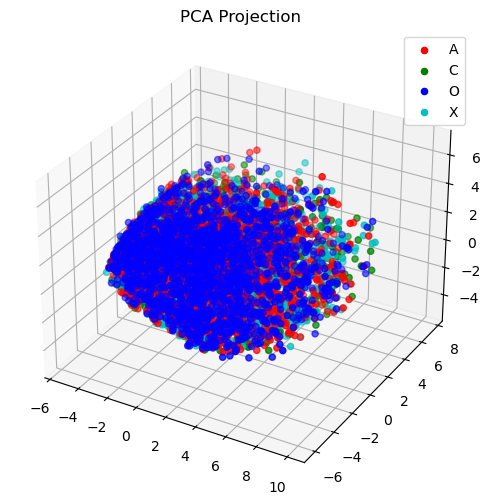

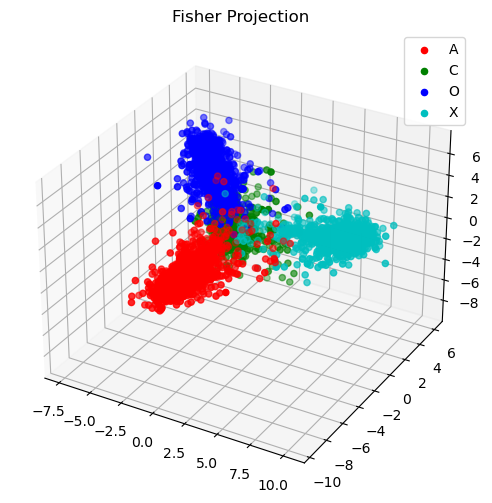

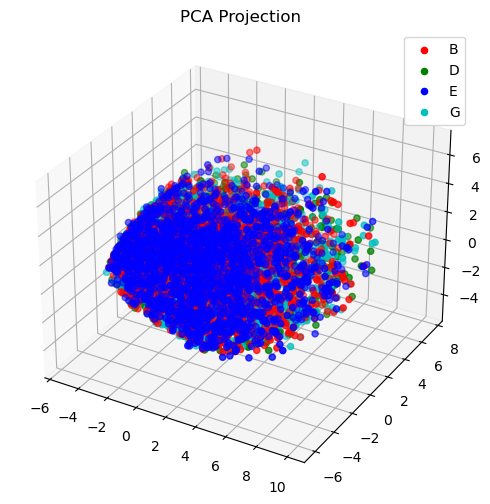

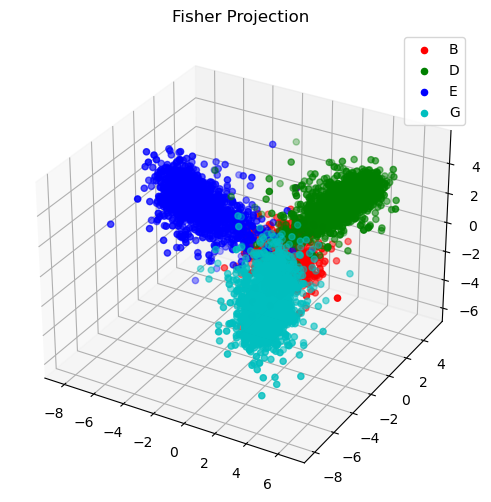

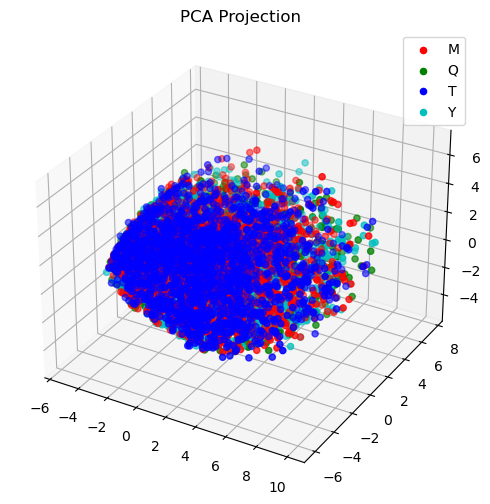

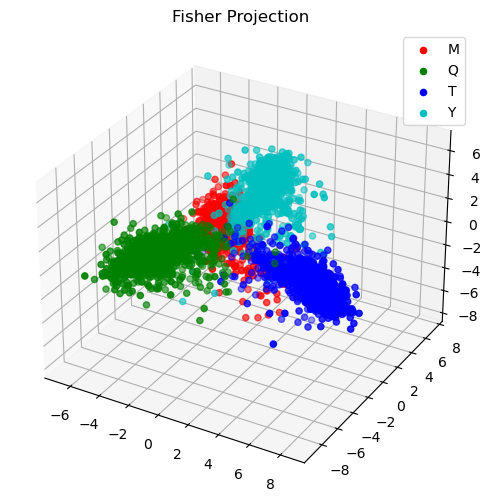

In [17]:
def main():
    pca_vs_fisher_3d(train1, ['A', 'C', 'O', 'X'])
    pca_vs_fisher_3d(train2, ['B', 'D', 'E', 'G'])
    pca_vs_fisher_3d(train3, ['M', 'Q', 'T', 'Y'])
    

if __name__ == "__main__":
    main()

### PROBLEM STATEMENT 2 : Visualizing all Classes via their Fisher Distance 

In [18]:
classes = sorted(df['labels'].unique())  # Assuming 'Class' column contains the class labels

# Computing Fisher Discriminant for each pair of classes
fisher_values = []

for class1, class2 in combinations(classes, 2):
    class1_data = df[df['labels'] == class1]
    class2_data = df[df['labels'] == class2]
    all_data = pd.concat([class1_data, class2_data])
    
    X1 = all_data.drop('labels', axis=1)  # Assuming the 'Class' column should be dropped
    y1 = all_data['labels']
    
    lda = LinearDiscriminantAnalysis()
    lda.fit(X1, y1)
    
    fisher_values.append((class1, class2, lda.score(X1, y1)))

# Creating a DataFrame to store the results
fisher_df = pd.DataFrame(fisher_values, columns=['Class 1', 'Class 2', 'Fisher Score'])


#### Displaying the fischer matrix dataframe for each pair of Letters

In [19]:
fisher_df

,Class 1,Class 2,Fisher Score
0,A,B,0.996521
1,A,C,0.997738
2,A,D,0.997738
3,A,E,0.998086
4,A,F,0.997042
...,...,...,...
320,W,Y,0.995999
321,W,Z,0.996868
322,X,Y,0.994781
323,X,Z,0.997216


In [20]:
 #Writing the DataFrame to a file
fisher_df.to_csv('fisher_distances.csv', index=False)

#### CLASS VISUALIZATION USING t-SNE

In [21]:
classes_f = sorted(set(fisher_df['Class 1']).union(set(fisher_df['Class 2'])))
num_classes = len(classes_f)

distance_matrix = np.zeros((num_classes, num_classes))

for index, row in fisher_df.iterrows():
    class1 = row['Class 1']
    class2 = row['Class 2']
    fisher_score = row['Fisher Score']
    
    idx1 = classes_f.index(class1)
    idx2 = classes_f.index(class2)
    
    distance_matrix[idx1][idx2] = fisher_score
    distance_matrix[idx2][idx1] = fisher_score

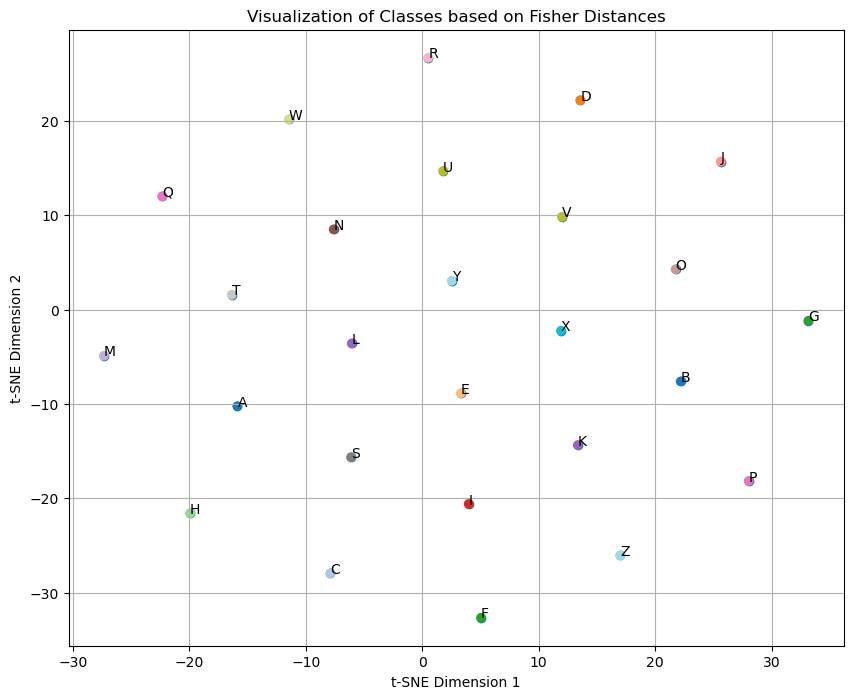

In [22]:
# Applying t-SNE for visualization

tsne = TSNE(n_components=2, perplexity=25)
embeddings_t = tsne.fit_transform(distance_matrix)

# Plotting for the classes on a 2-D plane
plt.figure(figsize=(10, 8))
plt.scatter(embeddings_t[:, 0], embeddings_t[:, 1])

# Adding labels for each point
for i, txt in enumerate(classes_f):
    plt.annotate(txt, (embeddings_t[i, 0], embeddings_t[i, 1]))

plt.title('Visualization of Classes based on Fisher Distances')
plt.scatter(embeddings_t[:, 0], embeddings_t[:, 1], c=np.arange(num_classes), cmap='tab20')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid(True)
plt.show()

#### CLASS VISUALIZATION USING MDS

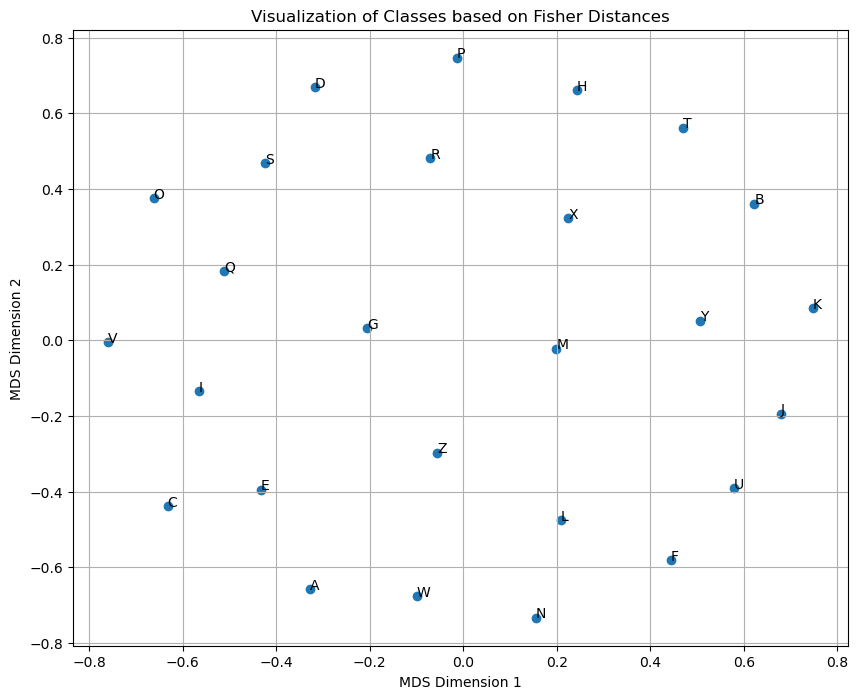

In [23]:
warnings.filterwarnings("ignore")
# Alternatively, applying MDS
mds = MDS(n_components=2, dissimilarity='precomputed')
embeddings_m = mds.fit_transform(distance_matrix)

# Plotting for the classes on a 2-D plane
plt.figure(figsize=(10, 8))
plt.scatter(embeddings_m[:, 0], embeddings_m[:, 1])

# Adding labels for each point
for i, txt in enumerate(classes_f):
    plt.annotate(txt, (embeddings_m[i, 0], embeddings_m[i, 1]))

plt.title('Visualization of Classes based on Fisher Distances')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.grid(True)
plt.show()

Interpretation is
•	Two classes with small Fisher distance are close to each other
•	Two classes with larger Fisher distance are far from each other

### PROBLEM STAEMENT 3: kNN and Parzen Window classifiers hyper parameter sweeps

#### Let us first do for k-NN

In [24]:
# Projecting the data into 25 Fisher dimensions
lda = LinearDiscriminantAnalysis(n_components=25)
X_fisher = lda.fit_transform(X, y)

# Implementing knn_sweep function
def knn_sweep(train_X, train_y, test_X, test_y, K=[1, 3, 5, 7, 9, 11, 13, 15, 17]):
    train_accuracy = []
    test_accuracy = []

    for k in K:
        # Initializing and train KNN classifier
        knn_classifier = KNeighborsClassifier(n_neighbors=k)
        knn_classifier.fit(train_X, train_y)

        # Predicting labels for train and test data
        train_pred = knn_classifier.predict(train_X)
        test_pred = knn_classifier.predict(test_X)

        # Computing accuracy for train and test data
        train_acc = accuracy_score(train_y, train_pred)
        test_acc = accuracy_score(test_y, test_pred)

        train_accuracy.append(train_acc)
        test_accuracy.append(test_acc)

    return k,train_accuracy, test_accuracy

# Saving the training data
train_X, test_X, train_y, test_y = train_test_split(X_fisher, y, test_size=0.3, random_state=42)

# Saving the training data for future use in KNN and Parzen methods
np.save('train_X.npy', train_X)
np.save('train_y.npy', train_y)

#### Fitting test data using KNN classifier

In [25]:
k, train_acc, test_acc = knn_sweep(train_X, train_y, test_X, test_y)
print("Train accuracy:", train_acc)
print("\nTest accuracy:", test_acc)

Train accuracy: [0.999980881734409, 0.9688754636179406, 0.9605207815546973, 0.95572209689137, 0.9523381638817726, 0.9494513057775399, 0.9472527052345812, 0.9457614805184874, 0.9449202768324858]

Test accuracy: [0.953920956374342, 0.9496832902132215, 0.9499509322865555, 0.9483450798465519, 0.9475421536265501, 0.9460255152109912, 0.9447765188687661, 0.9440628066732091, 0.9433937014898742]


#### Save results to CSV

In [26]:
K=[1, 3, 5, 7, 9, 11, 13, 15, 17]
k_means_df = pd.DataFrame({'k-value': K, 'train-accuracy': train_acc, 'test-accuracy': test_acc})
k_means_df.to_csv('knn.csv', index=False)

#### Plotting for Train data

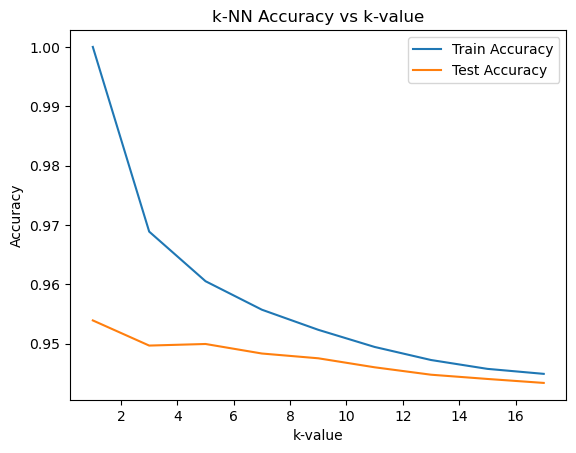

In [27]:
plt.plot([1, 3, 5, 7, 9, 11, 13, 15, 17],train_acc, label='Train Accuracy')
plt.plot([1, 3, 5, 7, 9, 11, 13, 15, 17],test_acc, label='Test Accuracy')
plt.xlabel('k-value')
plt.ylabel('Accuracy')
plt.title('k-NN Accuracy vs k-value')
plt.legend()
plt.show()

#### Now , we will do for Parzen Window

In [28]:
def fisher_projection(train_data, num_dimensions=25):
    # The train_data is a numpy array with shape (n_samples, 784)
    pca = PCA(n_components=num_dimensions)
    pca.fit(train_data)
    projected_train_data = pca.transform(train_data)
    return projected_train_data

In [29]:
# Implementing parzen_sweep function

def parzen_sweep(train, test, sigma = [0.1, 0.5, 1, 1.5, 2, 3, 4, 6, 8, 10]):
    train_accuracy_parzen = []
    test_accuracy_parzen = []

    for s in sigma:
        parzen = KernelDensity(bandwidth=s)
        parzen.fit(train)
        
        train_scores = parzen.score_samples(train)
        test_scores = parzen.score_samples(test)
        
        train_pred_parzen = np.where(train_scores > np.percentile(train_scores, 50), 1, 0)
        test_pred_parzen = np.where(test_scores > np.percentile(train_scores, 50), 1, 0)
        
        train_acc_parzen = accuracy_score(train_y, train_pred_parzen)
        test_acc_parzen = accuracy_score(test_y, test_pred_parzen)
        
        train_accuracy_parzen.append(train_acc_parzen)
        test_accuracy_parzen.append(test_acc_parzen)

    df = pd.DataFrame({'sigma-value': sigma, 'train-accuracy': train_accuracy_parzen, 'test-accuracy': test_accuracy_parzen})
    df.to_csv('Parzen.csv', index=False)
    
    # Plotting
    plt.plot(sigma, train_accuracy_parzen, label='Train Accuracy')
    plt.plot(sigma, test_accuracy_parzen, label='Test Accuracy')
    plt.xlabel('sigma-value')
    plt.ylabel('Accuracy')
    plt.title('Parzen Window Accuracy vs sigma-value')
    plt.legend()
    plt.show()



In [30]:
# Perform Parzen sweep
parzen_sweep(train_X, test_X)

### PROBLEM 4: Perceptron vs. Logistic Regression

In [48]:
from sklearn.linear_model import Perceptron, LogisticRegression

def perceptron_model(train, test, num_runs=100):
    train_accuracies = []
    test_accuracies = []
    
    for _ in range(num_runs):
        clf = Perceptron()
        clf.fit(train.iloc[:, :-1], train.iloc[:, -1])
        
        train_pred = clf.predict(train.iloc[:, :-1])
        test_pred = clf.predict(test.iloc[:, :-1])
        
        train_acc = accuracy_score(train.iloc[:, -1], train_pred)
        test_acc = accuracy_score(test.iloc[:, -1], test_pred)
        
        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)
    
    # Save results to CSV
    df = pd.DataFrame({'run': range(1, num_runs+1), 'train-accuracy': train_accuracies, 'test-accuracy': test_accuracies})
    df.to_csv('perceptron_A_C.csv', index=False)
    
    # Plot histograms
    plt.hist(train_accuracies, bins=10, alpha=0.5, label='Train Accuracy')
    plt.hist(test_accuracies, bins=10, alpha=0.5, label='Test Accuracy')
    plt.xlabel('Accuracy')
    plt.ylabel('Frequency')
    plt.title('Perceptron Model Accuracy Histogram')
    plt.legend()
    plt.show()
    
    return np.mean(train_accuracies), np.mean(test_accuracies)


In [50]:

def logistic_model(train, test, num_runs=100):
    train_accuracies = []
    test_accuracies = []
    
    for _ in range(num_runs):
        clf = LogisticRegression()
        clf.fit(train.iloc[:, :-1], train.iloc[:, -1])
        
        train_pred = clf.predict(train.iloc[:, :-1])
        test_pred = clf.predict(test.iloc[:, :-1])
        
        train_acc = accuracy_score(train.iloc[:, -1], train_pred)
        test_acc = accuracy_score(test.iloc[:, -1], test_pred)
        
        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)
    
    # Save results to CSV
    df = pd.DataFrame({'run': range(1, num_runs+1), 'train-accuracy': train_accuracies, 'test-accuracy': test_accuracies})
    df.to_csv('logistic_A_C.csv', index=False)
    
    # Plot histograms
    plt.hist(train_accuracies, bins=10, alpha=0.5, label='Train Accuracy')
    plt.hist(test_accuracies, bins=10, alpha=0.5, label='Test Accuracy')
    plt.xlabel('Accuracy')
    plt.ylabel('Frequency')
    plt.title('Logistic Regression Model Accuracy Histogram')
    plt.legend()
    plt.show()
    
    return np.mean(train_accuracies), np.mean(test_accuracies)


In [33]:
train_data, test_data, train_labels, test_labels = train_test_split(X_fisher,y, test_size=0.3, random_state=42)

In [34]:
train=pd.DataFrame(train_data)
train.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-0.010635,-0.004706,-2.000374,0.937092,1.170203,-0.432047,-0.403937,-0.162591,-0.841517,-0.239230,...,-0.527028,0.309073,0.483623,-0.770235,0.500641,0.490967,0.414929,0.317049,-0.653705,-0.296279
1,-2.182291,-1.608741,0.921589,-0.835349,-0.324533,8.690008,-3.315328,1.649913,-2.371755,0.894491,...,2.551988,-1.673780,0.599849,-0.314670,0.804259,0.458007,-0.296758,-1.252039,0.737170,0.388809
2,-2.166866,1.765337,3.164716,0.165461,0.191416,1.822336,-1.627483,1.473428,2.068726,-3.028627,...,1.510661,-0.263166,2.794036,-0.130577,0.871500,-0.709263,-0.381485,-0.532153,0.081471,3.006210
3,0.847058,8.342935,2.220636,-1.832116,0.055584,-0.106353,-0.687229,0.140511,-0.870305,3.815464,...,0.571590,0.929714,0.061752,0.372203,-0.476147,2.202579,-0.273973,-0.257480,0.323147,-3.255755
4,2.759238,-2.066681,2.244895,5.382870,-0.883893,-1.636434,3.387286,0.897950,-2.119169,2.279197,...,2.220095,-1.239257,1.337908,0.832069,-0.703987,1.604814,-1.681806,1.058906,0.856046,-0.475940


In [35]:
test=pd.DataFrame(test_data)
test.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-1.173890,0.574730,-0.627108,1.862243,-0.825735,-1.625024,-1.504766,-1.987191,0.329724,0.001958,...,-2.421819,-1.675567,0.113483,-0.233760,1.052643,1.220425,-2.354336,-1.921572,1.779674,-2.234739
1,-0.911763,-1.880317,2.010052,-2.066613,0.320311,-2.311390,0.162530,0.511578,-2.303219,-0.159633,...,-2.383924,-0.548969,-1.318021,0.338418,2.146677,1.089029,-0.583479,-3.070547,2.524616,0.793593
2,-0.083420,0.543995,-4.333138,0.955177,5.594139,-0.785833,-1.094576,1.121150,-0.548717,0.298774,...,-0.060136,0.202436,0.772125,0.477734,0.530026,-0.247024,-0.965253,0.786507,1.439950,0.718410
3,-1.502030,-1.195717,-0.084257,0.224634,-1.866854,0.226509,-1.749815,1.981896,0.517060,-1.548669,...,-0.233218,0.719113,1.670103,2.045536,-2.586951,0.530637,0.603656,-0.848716,0.253199,0.824760
4,2.592072,-1.259880,0.644877,2.543958,1.372800,1.496781,4.770687,1.586013,-0.363332,1.536924,...,0.380386,1.167587,1.081369,-0.671900,0.405313,0.694691,0.730497,-0.273397,0.355009,0.164079


In [36]:
train_label = pd.DataFrame(train_labels)
train_label.head()

,labels
46879,L
40221,S
46338,H
14845,X
41259,P


In [37]:
test_label = pd.DataFrame(test_labels)
test_label.head()

,labels
68337,D
21696,U
15703,L
20747,B
51876,F


In [45]:
#For train data
train["labels"]=train_label 
train_data_selected = train[train["labels"]=="A"]
train_data_selected = train_data_selected.append(train[train["labels"]=="C"])
train_data_selected.head()
#print(train_data_selected["labels"].unique())

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,labels
14,-1.722772,4.998874,1.022002,-0.174483,-0.353906,-0.054024,-1.201764,-3.647191,-1.937142,0.211302,...,1.012799,1.441929,-3.270850,-1.761348,-1.016876,0.210888,-1.321116,1.582280,3.374619,A
18,-2.455946,1.824508,2.404133,0.287131,0.611479,2.467706,1.020176,0.281672,1.251500,-2.085498,...,-2.245635,1.711180,1.001084,-1.169958,1.946516,0.062218,-0.518696,-0.392744,-2.718859,A
26,0.788130,4.436605,2.024607,0.654812,-0.158764,0.633377,-1.138416,-0.679852,0.932913,-2.186858,...,0.478448,2.561956,2.016771,-3.878698,0.451977,2.241304,-2.076373,1.145132,2.067127,A
27,-0.473360,0.340059,-0.199123,0.208604,0.342357,0.334194,0.129254,-0.517977,-0.233603,-0.125129,...,-0.555423,0.445801,0.076960,0.075628,0.367019,0.494624,-0.257650,-1.256703,0.169139,A
38,-0.883149,0.041786,0.257350,-1.234099,-1.331179,-0.659299,1.881964,2.196652,1.813586,0.283249,...,-0.944352,-1.123249,0.930955,-1.750535,-1.879012,-1.254512,-2.535177,-1.424890,1.888088,A


In [44]:
test["labels"]=test_label
test_data_selected = test[test["labels"]=="A"]
test_data_selected=test_data_selected.append(test[test["labels"] == "C"])
test_data_selected.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,labels
4,2.592072,-1.259880,0.644877,2.543958,1.372800,1.496781,4.770687,1.586013,-0.363332,1.536924,...,1.167587,1.081369,-0.671900,0.405313,0.694691,0.730497,-0.273397,0.355009,0.164079,A
32,-2.363945,-3.807851,-0.517909,1.505078,-1.881972,-0.853683,-0.980656,0.624810,-2.432852,1.506519,...,1.531999,-1.244251,-0.913694,0.090750,-1.252066,2.938057,1.293210,-1.837031,0.321269,A
54,2.422907,-0.921707,-0.040044,2.043193,1.191101,2.213685,3.003943,-0.827820,-0.117426,-0.523066,...,0.549067,0.075115,-2.254655,1.698214,-1.240772,-0.623150,-0.974844,0.287196,-0.049736,A
62,10.937477,-0.947990,-2.182613,-2.421650,-1.287419,1.345550,0.572210,-2.672429,-0.565234,-1.933928,...,-2.255952,0.487660,-1.941754,-0.954991,0.940599,-0.465919,-0.918910,0.168202,0.258182,A
85,0.135205,-0.961947,1.257936,-1.217816,1.025028,-2.321890,0.129320,0.907812,-1.606203,-0.781187,...,-0.187854,-1.390128,0.362127,1.413445,1.267020,-1.228128,-1.762327,1.423377,-0.099035,A


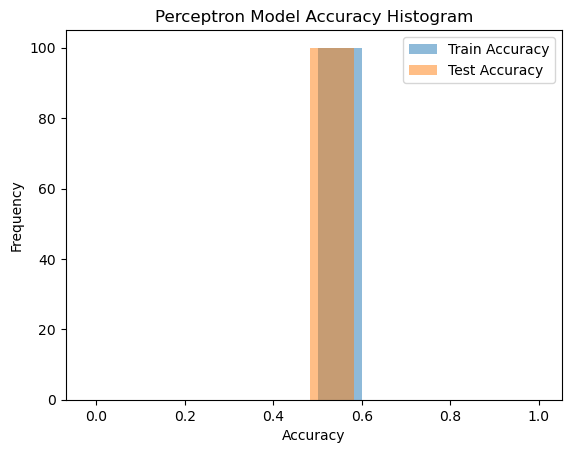

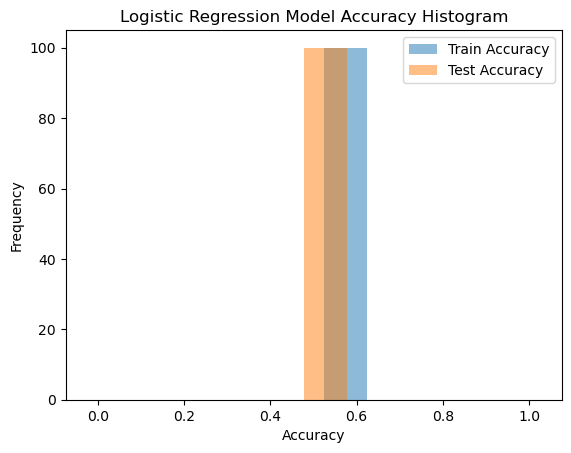

Average Train Accuracy for Perceptron: 0.5008750437521875
Average Test Accuracy for Perceptron: 0.4820000000000001
Average Train Accuracy for Logistic Regression: 0.5236261813090655
Average Test Accuracy for Logistic Regression: 0.4779999999999999


In [51]:

# Run perceptron and logistic models
perceptron_avg_train_acc, perceptron_avg_test_acc = perceptron_model(train_data_selected, test_data_selected)
logistic_avg_train_acc, logistic_avg_test_acc = logistic_model(train_data_selected, test_data_selected)

print("Average Train Accuracy for Perceptron:", perceptron_avg_train_acc)
print("Average Test Accuracy for Perceptron:", perceptron_avg_test_acc)
print("Average Train Accuracy for Logistic Regression:", logistic_avg_train_acc)
print("Average Test Accuracy for Logistic Regression:", logistic_avg_test_acc)